# The problem statement

Agricultural productivity is influenced by multiple factors, including climate, soil type, and farming practices. Predicting crop yield accurately can help optimize agricultural output, ensure food security, and support decision-making for farmers and policymakers. This project aims to develop a machine learning model to predict crop yield based on climate variables, soil characteristics, and farming practices.

# Goal of the data

To predict crop yield (tons per hectare) using climate, soil, and farming factors, enabling data-driven agricultural optimization.

# Source of dataset

Kaggle:https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield/data

# Key Features

1.Region:Geographical region where farming occurs.

2.Soil_Type:Type of soil (Sandy, Clay, Loam, etc.).

3.Crop:Type of crop cultivated.

4.Rainfall_mm:Annual rainfall in millimeters.

5.Temperature_Celsius:Average temperature in Celsius.

6.Fertilizer_Used:Boolean indicating whether fertilizer was used.

7.Irrigation_Used:Boolean indicating whether irrigation was used.

8.Weather_Condition:Categorical variable indicating predominant weather (Sunny, Rainy, Cloudy).

9.Days_to_Harvest: Number of days taken for the crop to be harvested.

10.Yield_tons_per_hectare:Crop yield in tons per hectare.

Target Variable: Yield_tons_per_hectare

# 1) Understad The Data

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load csv dataset
df=pd.read_csv('/content/crop_yield.csv')
df

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


In [ ]:
df.shape

(1000000, 10)

In [ ]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [ ]:
# show first 10 rows of the dataset
df.head(10)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
5,South,Silt,Soybean,797.471182,37.704974,False,True,Rainy,74,5.898416
6,West,Clay,Wheat,357.902357,31.593431,False,False,Rainy,90,2.652392
7,South,Sandy,Rice,441.131154,30.887107,True,True,Sunny,61,5.829542
8,North,Silt,Wheat,181.587861,26.752729,True,False,Sunny,127,2.943716
9,West,Sandy,Wheat,395.048968,17.646199,False,True,Rainy,140,3.707293


In [ ]:
df.tail(10)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
999990,North,Sandy,Soybean,270.497720,20.392190,False,True,Sunny,119,2.164441
999991,East,Clay,Soybean,349.872329,17.036670,True,False,Cloudy,100,3.033848
999992,South,Clay,Rice,984.947787,21.507580,False,True,Rainy,92,6.758406
999993,West,Loam,Maize,196.392138,30.261504,True,True,Rainy,107,3.689114
999994,West,Loam,Wheat,167.459161,22.153946,False,True,Cloudy,120,2.930204
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159
999999,West,Sandy,Maize,180.936180,27.298847,True,False,Sunny,76,2.937243


In [ ]:
df.sample(10)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
87618,South,Peaty,Soybean,463.364156,34.595034,False,False,Cloudy,96,2.565996
255801,North,Chalky,Wheat,224.623715,24.605956,False,False,Cloudy,112,1.663484
839075,South,Sandy,Soybean,793.661531,28.827722,False,False,Rainy,92,5.148646
42380,West,Peaty,Barley,628.032527,24.052748,False,True,Rainy,72,4.682856
560593,North,Loam,Wheat,203.489512,33.196331,True,True,Sunny,87,3.828423
100190,North,Loam,Rice,349.080517,36.796454,True,False,Rainy,115,4.574118
96558,East,Chalky,Soybean,108.641705,22.123792,True,True,Cloudy,126,4.061230
862949,South,Silt,Soybean,319.543717,21.602408,True,True,Rainy,78,4.361084
201290,East,Sandy,Barley,900.812323,15.211876,False,True,Sunny,107,5.813691
106577,South,Chalky,Cotton,268.527761,30.570897,False,False,Sunny,115,1.505997


In [ ]:
df.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [ ]:
df

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


# 2) Data Cleaning

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [ ]:
df.isnull().sum()

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


In [ ]:
df

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


# 3) Descriptive statistics

In [ ]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [ ]:
df.describe(include=['object'])

,Region,Soil_Type,Crop,Weather_Condition
count,1000000,1000000,1000000,1000000
unique,4,6,6,3
top,North,Sandy,Maize,Sunny
freq,250173,167119,166824,333790


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


# 4) Data visualization

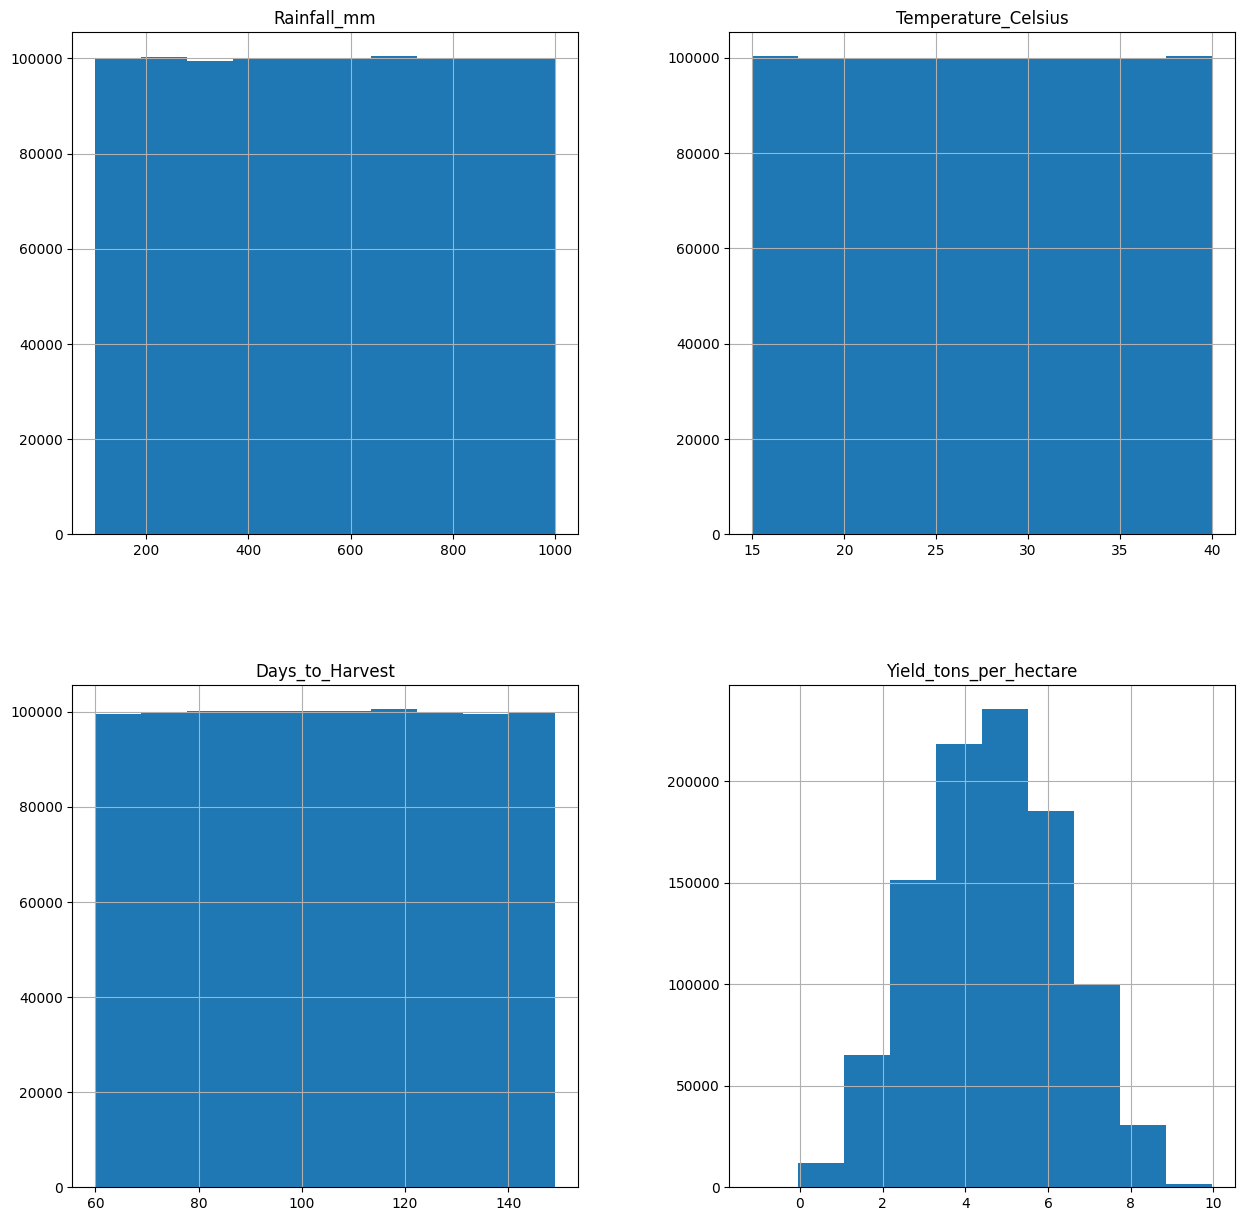

In [ ]:
# ploting histogram for each feature
df.hist(figsize=(15,15))
plt.show()

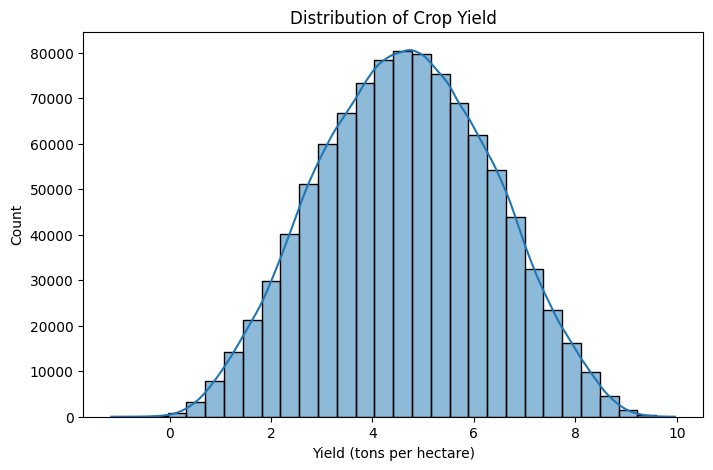

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(8,5))
sns.histplot(df['Yield_tons_per_hectare'], bins=30, kde=True)
plt.title("Distribution of Crop Yield")
plt.xlabel("Yield (tons per hectare)")
plt.show()

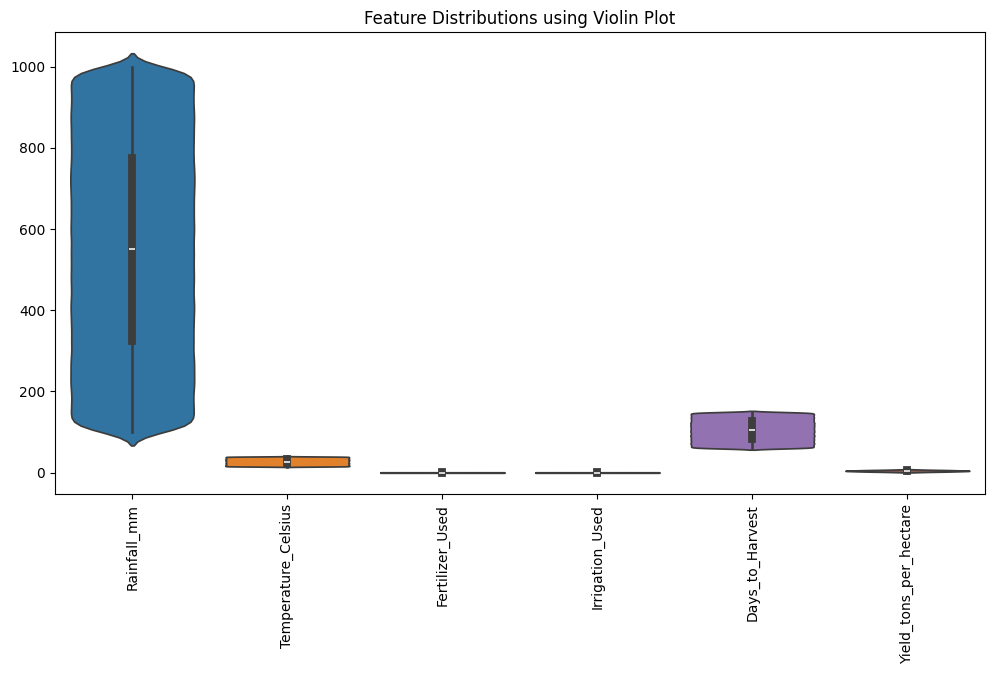

In [ ]:
# Violin Plot for Feature Distributions
plt.figure(figsize=(12, 6))
sns.violinplot(data=df)
plt.xticks(rotation=90)
plt.title('Feature Distributions using Violin Plot')
plt.show()

,0
Rainfall_mm,"Axes(0.125,0.747241;0.227941x0.132759)"
Temperature_Celsius,"Axes(0.398529,0.747241;0.227941x0.132759)"
Days_to_Harvest,"Axes(0.672059,0.747241;0.227941x0.132759)"
Yield_tons_per_hectare,"Axes(0.125,0.587931;0.227941x0.132759)"


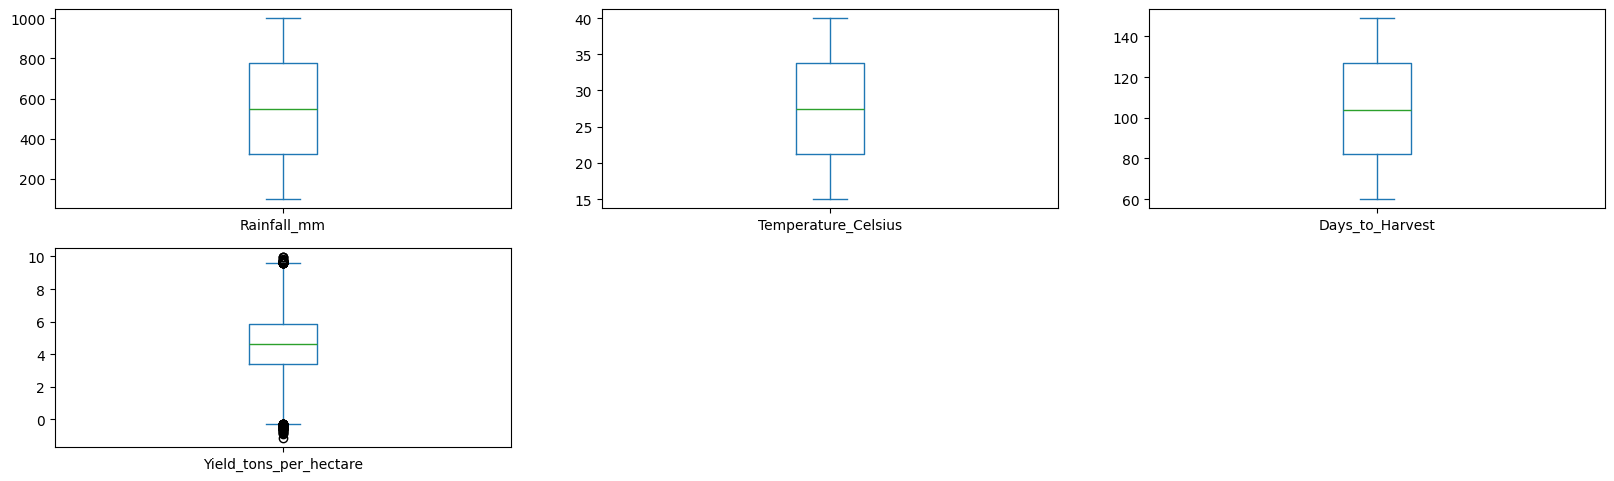

In [ ]:
df.plot(kind="box",subplots=True,layout=(5,3),figsize=(20,15))

# 5) Outlier detection





In [ ]:
# Z-score to detect outliers
from scipy import stats
c=['Rainfall_mm','Temperature_Celsius',
  'Days_to_Harvest','Yield_tons_per_hectare']
for i in c:
    zs=np.abs(stats.zscore(df[i]))
    o=df[zs>3]
    print(f'number of outliers in {i} : {o.shape[0]}')

number of outliers in Rainfall_mm : 0
number of outliers in Temperature_Celsius : 0
number of outliers in Days_to_Harvest : 0
number of outliers in Yield_tons_per_hectare : 37


In [ ]:
#Converting all the strings to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
for col in ['Region','Soil_Type','Crop','Weather_Condition']:
    if df[col].dtype=='object':
        le = LabelEncoder()
        df[col]=le.fit_transform(df[col])

# 6) Correlation

In [ ]:
c=df.corr()
c

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
Region,1.000000,-0.001143,0.000494,0.000478,0.000784,0.000570,0.000217,-0.001450,-0.001169,0.000390
Soil_Type,-0.001143,1.000000,0.000869,-0.000678,0.000732,0.001364,-0.000564,0.001695,0.000602,-0.000333
Crop,0.000494,0.000869,1.000000,0.001214,0.000286,0.000871,0.000657,-0.001783,0.000329,0.001283
Rainfall_mm,0.000478,-0.000678,0.001214,1.000000,-0.000123,-0.001076,-0.000568,0.001360,-0.002669,0.764618
Temperature_Celsius,0.000784,0.000732,0.000286,-0.000123,1.000000,0.002343,-0.000484,-0.000833,-0.000731,0.085565
Fertilizer_Used,0.000570,0.001364,0.000871,-0.001076,0.002343,1.000000,0.001510,0.000643,-0.001029,0.442099
Irrigation_Used,0.000217,-0.000564,0.000657,-0.000568,-0.000484,0.001510,1.000000,-0.000556,-0.001234,0.353741
Weather_Condition,-0.001450,0.001695,-0.001783,0.001360,-0.000833,0.000643,-0.000556,1.000000,-0.000397,0.001132
Days_to_Harvest,-0.001169,0.000602,0.000329,-0.002669,-0.000731,-0.001029,-0.001234,-0.000397,1.000000,-0.002591
Yield_tons_per_hectare,0.000390,-0.000333,0.001283,0.764618,0.085565,0.442099,0.353741,0.001132,-0.002591,1.000000


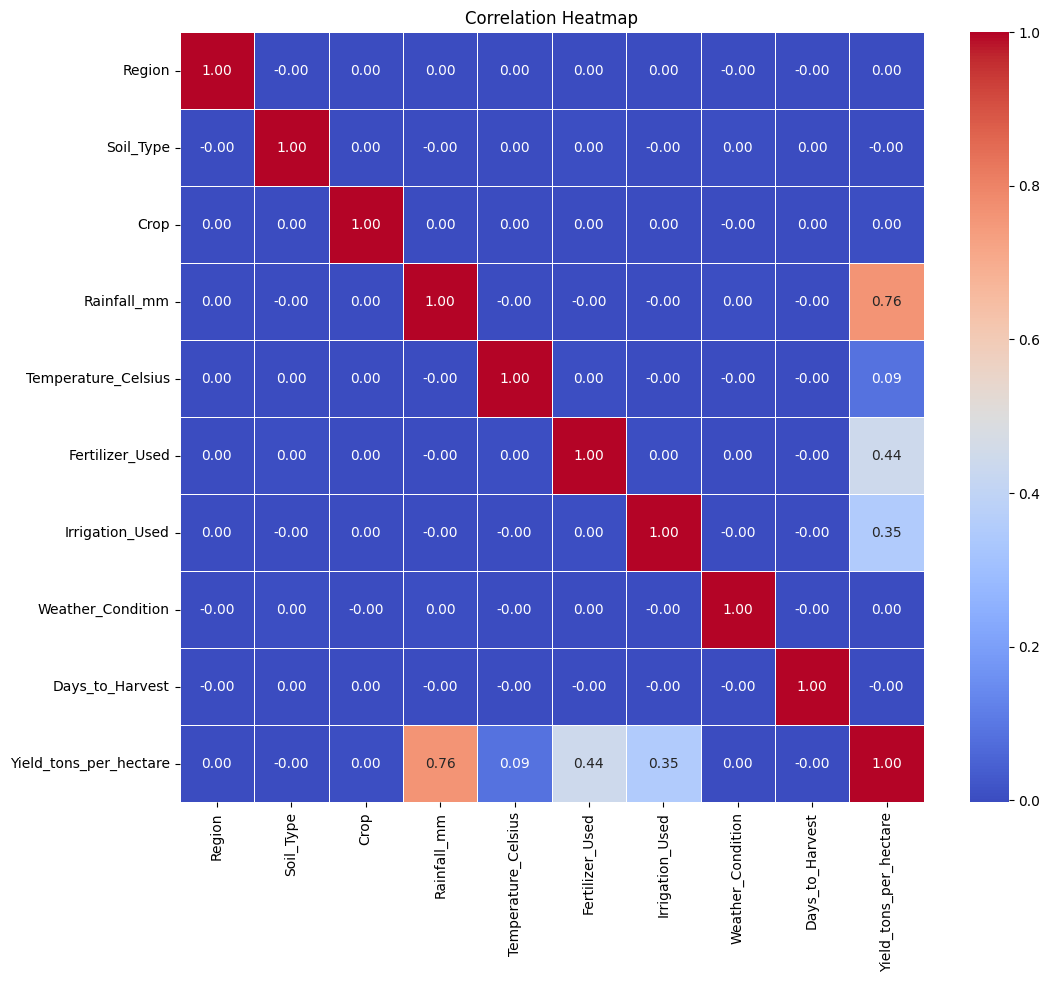

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(c,annot=True,cmap='coolwarm',fmt=".2f",linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# 7) Feature engineering

In [ ]:
# checking the skewness of each column
df.skew()

,0
Region,-0.000454
Soil_Type,-0.000930
Crop,0.000620
Rainfall_mm,-0.000934
Temperature_Celsius,-0.000534
Fertilizer_Used,0.000240
Irrigation_Used,0.002036
Weather_Condition,-0.002096
Days_to_Harvest,0.000033
Yield_tons_per_hectare,-0.000862


In [ ]:
# reducing all features range except target using log1p to reduce skewness
# c=['Region','Soil_Type','Crop','Rainfall_mm','Temperature_Celsius',
#    'Fertilizer_Used','Irrigation_Used','Weather_Condition','Days_to_Harvest']

# for i in c:
#     df[i]=np.log1p(df[i])

# 8) Dimensionality reduction

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Standardize the features before PCA
# features = ['Region','Soil_Type','Crop','Rainfall_mm','Temperature_Celsius',
#    'Fertilizer_Used','Irrigation_Used','Weather_Condition','Days_to_Harvest']
# X=StandardScaler().fit_transform(df[features])

# # Apply PCA
# pca=PCA(n_components=2)
# pca_result=pca.fit_transform(X)

# # Add PCA results to the DataFrame
# df['pca1']=pca_result[:,0]
# df['pca2']=pca_result[:,1]

# # Visualize PCA results
# sns.scatterplot(x='pca1',y='pca2',hue='Yield_tons_per_hectare',data=df)
# plt.title('PCA of Agriculture Dataset')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

# 9) Data scailing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ##Standardization (mean = 0, std = 1)
# scaler=StandardScaler()
# df[['Region','Soil_Type','Crop','Rainfall_mm','Temperature_Celsius',
#    'Fertilizer_Used','Irrigation_Used','Weather_Condition']]=scaler.fit_transform(df[['Region','Soil_Type','Crop','Rainfall_mm','Temperature_Celsius',
#                                                                                      'Fertilizer_Used','Irrigation_Used','Weather_Condition']])



#Normalization (scaling to 0-1 range)
minmax_scaler=MinMaxScaler()
df[['Region','Soil_Type','Crop','Rainfall_mm','Temperature_Celsius',
   'Fertilizer_Used','Irrigation_Used','Weather_Condition']]=minmax_scaler.fit_transform(df[['Region','Soil_Type','Crop','Rainfall_mm','Temperature_Celsius',
                                                                                                               'Fertilizer_Used','Irrigation_Used','Weather_Condition']])

# 10) Initial modeling and hypothesis testing

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
model=LinearRegression()

# Define features and target variable
x=df[['Region','Soil_Type','Crop','Rainfall_mm','Temperature_Celsius',
   'Fertilizer_Used','Irrigation_Used','Weather_Condition','Days_to_Harvest']]
y=df['Yield_tons_per_hectare']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Predict and evaluate the model
r2=r2_score(y_test,y_pred)
print(f'Baseline model r2score: {r2}')
mae=mean_absolute_error(y_test,y_pred)
print(f'Baseline model mae: {mae}')
mse=mean_squared_error(y_test,y_pred)
#print(f'Baseline model mse: {mse}')
rmse=sqrt(mse)
print(f'Baseline model rmse: {rmse}')

Baseline model r2score: 0.913015461869577
Baseline model mae: 0.3995520652697099
Baseline model rmse: 0.5007711988894283


In [ ]:
# # DecisionTreeRegressor
# dt_model = DecisionTreeRegressor()
# dt_model.fit(X_train, y_train)
# y_pred_dt = dt_model.predict(X_test)

# mse_dt = mean_squared_error(y_test, y_pred_dt)
# rmse_dt = np.sqrt(mse_dt)
# r2_dt = r2_score(y_test, y_pred_dt)
# print(f'Decision Tree - MSE: {mse_dt:.4f}, RMSE: {rmse_dt:.4f}, R²: {r2_dt:.4f}')


In [ ]:
# # RandomForestRegressor
# rf_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
# rf_model.fit(X_train, y_train)
# y_pred_rf = rf_model.predict(X_test)

# mse_rf = mean_squared_error(y_test, y_pred_rf)
# rmse_rf = np.sqrt(mse_rf)
# r2_rf = r2_score(y_test, y_pred_rf)
# print(f'Random Forest - MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}')


In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Define models in a dictionary
# models = {
#     "Linear Regression": LinearRegression(),
#     "Decision Tree": DecisionTreeRegressor(random_state=42),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
# }

# # Dictionary to store results
# results = {}

# # Train and evaluate models using a loop
# for name, model in models.items():
#     print(f"Training {name}...")

#     # Train model
#     model.fit(X_train, y_train)

#     # Predictions
#     y_pred = model.predict(X_test)

#     # Calculate performance metrics
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred)

#     # Store results
#     results[name] = {"MSE": mse, "RMSE": rmse, "R² Score": r2}

#     # Print results
#     print(f"{name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}\n")

# # Convert results to DataFrame for better visualization
# import pandas as pd
# results_df = pd.DataFrame(results).T
# print(results_df)


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt


# # Define your features (X) and target (y)
# X = df[['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
#        'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest']]
# y = df['Yield_tons_per_hectare']

# # Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define models in a dictionary
# models = {
#     "Linear Regression": LinearRegression(),
#     "Decision Tree": DecisionTreeRegressor(random_state=42),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
#     "Support Vector Regression": SVR(),
#     "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42)
# }

# # Try importing XGBoost (optional)
# try:
#     from xgboost import XGBRegressor
#     models["XGBoost Regressor"] = XGBRegressor(n_estimators=100, random_state=42)
# except ImportError:
#     print("XGBoost not installed, skipping...")

# # Dictionary to store results
# results = {}

# # Train and evaluate models using a loop
# for name, model in models.items():
#     print(f"Training {name}...")

#     # Train model
#     model.fit(X_train, y_train)

#     # Predictions
#     y_pred = model.predict(X_test)

#     # Calculate performance metrics
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred)

#     # Store results
#     results[name] = {"MSE": mse, "RMSE": rmse, "R² Score": r2}

#     # Print results
#     print(f"{name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}\n")

# # Convert results to DataFrame for better visualization
# results_df = pd.DataFrame(results).T
# print(results_df)


# # Feature Importance Plot (For Tree-Based Models)

# tree_models = ["Random Forest", "Decision Tree", "Gradient Boosting Regressor"]
# plt.figure(figsize=(10, 6))

# for name in tree_models:
#     if name in models:
#         feature_importances = pd.Series(models[name].feature_importances_, index=X.columns)
#         feature_importances.sort_values(ascending=False).plot(kind='bar', alpha=0.5, label=name)

# plt.title('Feature Importance - Tree-Based Models')
# plt.legend()
# plt.show()

Training Linear Regression...
Linear Regression - MSE: 0.2508, RMSE: 0.5008, R² Score: 0.9130

Training Decision Tree...
Decision Tree - MSE: 0.5323, RMSE: 0.7296, R² Score: 0.8154

Training Random Forest...
Random Forest - MSE: 0.2670, RMSE: 0.5167, R² Score: 0.9074

Training Support Vector Regression...


# 11) Documentation and Reporting

In [ ]:
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum(),
    'Correlation of': df.corr()['Yield_tons_per_hectare'].sort_values(ascending=False)
}

print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")



EDA Summary:
Dataset Shape: (1000000, 10)
Missing Values: Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64
Correlation of: Yield_tons_per_hectare    1.000000
Rainfall_mm               0.764618
Fertilizer_Used           0.442099
Irrigation_Used           0.353741
Temperature_Celsius       0.085565
Crop                      0.001283
Weather_Condition         0.001132
Region                    0.000390
Soil_Type                -0.000333
Days_to_Harvest          -0.002591
Name: Yield_tons_per_hectare, dtype: float64


# Summary

This project focuses on predicting crop yield (in tons per hectare) using various agricultural and climatic factors. The dataset, sourced from Kaggle, includes features such as region, soil type, crop type, rainfall, temperature, fertilizer usage, irrigation, weather condition, and days to harvest. The goal is to use these variables to accurately estimate crop productivity, thereby supporting informed decision-making in agriculture. The data underwent cleaning, including the handling of missing values and detection of outliers using Z-score. Categorical variables like soil type and crop were converted into numerical values using Label Encoding. Exploratory Data Analysis (EDA) provided insights into the distribution and relationships between variables, highlighting the importance of temperature, rainfall, and fertilizer in influencing crop yield. A Random Forest Regressor model was trained and evaluated using metrics like R² and Mean Squared Error. The model showed good predictive capability, with feature importance indicating key drivers of yield. Although hyperparameter tuning was not performed, the results are promising and suggest that machine learning can effectively support precision agriculture efforts.
